<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Debere/irys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
data = datasets.load_iris()

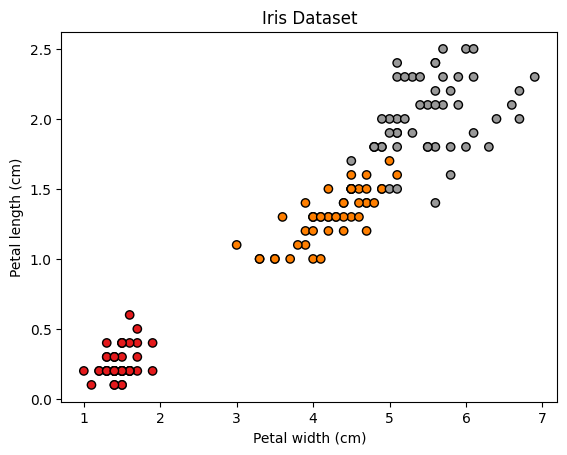

Dokładność klasyfikacji: 1.0
Zysk informacyjny dla podziału a): 0.864337562184764
Zysk informacyjny dla podziału b): 0.6195148513196114


In [8]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

# Wczytanie danych Iris
data = datasets.load_iris()
X = data.data
y = data.target

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Funkcja do obliczenia entropii
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Funkcja do obliczenia zysku informacyjnego
def information_gain(parent, splits):
    num_parent = len(parent)
    num_splits = np.sum([len(split) for split in splits])
    entropy_parent = entropy(parent)
    entropy_children = np.sum([(len(split) / num_splits) * entropy(split) for split in splits])
    return entropy_parent - entropy_children

# Wizualizacja danych
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Petal width (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Iris Dataset')
plt.show()

# Tworzenie klasyfikatora drzewa decyzyjnego
clf = DecisionTreeClassifier(criterion='entropy')

# Trening klasyfikatora na danych treningowych
clf.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = clf.predict(X_test)

# Obliczenie dokładności klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)

# Podział danych na dwie grupy na podstawie petal width (cm) = 0.5 i 0.38
split_a = X[:, 3] <= 0.5
split_b = X[:, 3] <= 0.38

# Obliczenie zysku informacyjnego
information_gain_a = information_gain(y, [y[split_a], y[~split_a]])
information_gain_b = information_gain(y, [y[split_b], y[~split_b]])

print("Zysk informacyjny dla podziału a):", information_gain_a)
print("Zysk informacyjny dla podziału b):", information_gain_b)
